In [1]:
import torch

from pipeline_interpolated_sdxl import InterpolationStableDiffusionXLPipeline
from prior import BetaPriorPipeline
from utils import image_grids


xl_pipe = InterpolationStableDiffusionXLPipeline.from_pretrained(
    "playgroundai/playground-v2.5-1024px-aesthetic", torch_dtype=torch.float16
)
generator = torch.cuda.manual_seed(1002)
dtype = torch.float16
xl_pipe.to("cuda", dtype=dtype)
beta_pipe = BetaPriorPipeline(xl_pipe)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/qiyuan/.conda/envs/AID/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [2]:
size = xl_pipe.default_sample_size
latent_start = torch.randn((1, 4, size, size,), device="cuda", dtype=dtype, generator=generator)
latent_end = torch.randn((1, 4, size, size,), device="cuda", dtype=dtype, generator=generator)

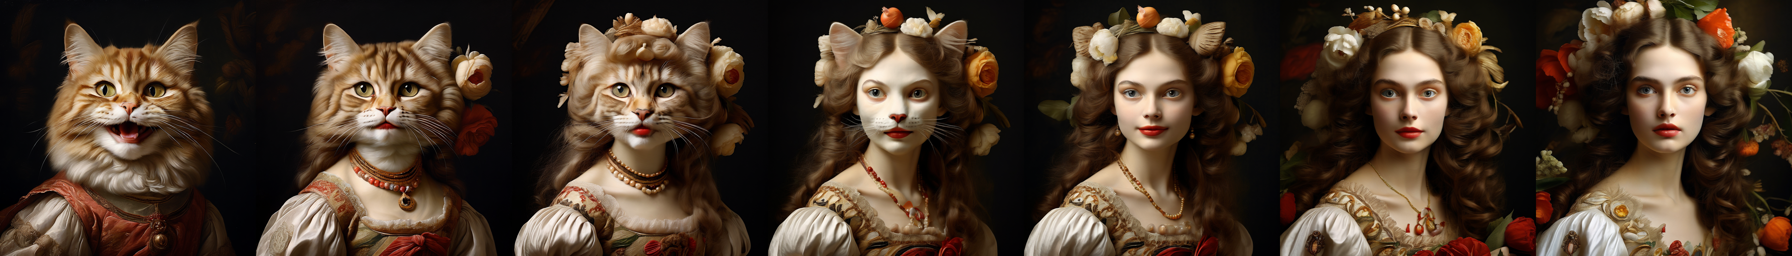

In [5]:
prompt_a = "masterpiece, best quality, very aesthetic, absurdres, A cat is smiling, face portrait"
prompt_b = "masterpiece, best quality, very aesthetic, absurdres, A beautiful lady, face portrait"
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]" # "deformed, ugly, wrong proportion, low res, bad anatomy, worst quality, low quality"
interpolation_size = 7
num_inference_steps = 28

images = beta_pipe.generate_interpolation(
    prompt_a,
    prompt_b,
    negative_prompt,
    latent_end,
    latent_end,
    num_inference_steps,
    exploration_size=20,
    interpolation_size=7
)

show_image = image_grids(images, 1, interpolation_size).resize((interpolation_size * 256, 256))
show_image